# Spaceship Titanic Kaggle Challenge

## 1. Import dependencies and load data

### 1.1 Install dependencies

In [1]:
%%capture

! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install missingno


# this code is only necessary for Mac M1 Chip
! pip install tensorflow-macos
! pip install tensorflow-metal

### 1.2 Import dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import seaborn as sns
import missingno as msno

### 1.3 Load the data

In [3]:
train = pd.read_csv("./spaceship-titanic/train.csv")
test = pd.read_csv("./spaceship-titanic/test.csv")

## 2. Analyze the dataset

### 2.1 Description of the dataset

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
9. **RoomService** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **FoodCourt** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **ShoppingMall** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **Spa** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
10. **Name** - The first and last names of the passenger.
11. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. Same columns as train.csv.


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [80]:
# We can see that CryoSleep and VIP contain boolean values but are saved as objects
# We need to transform them for later analysis
train[["CryoSleep", "VIP"]] = train[["CryoSleep", "VIP"]].astype(bool)

In [85]:
# Show description of all numeric features
train.describe(include=float).applymap(lambda x: f"{x:0.2f}") # Round to 2 decimals

# Interesting: .applymap() applies function elementwise, so to every element of DF

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [7]:
# Show all categorical and boolean features
train.describe(include=[object, bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


### 2.3 Check for NaN-values

In [8]:
print(f"Number of rows:                      {len(train)}")
print(f"Number of rows with >= 1 NaN-value:  {(train.isna().any(1).sum())}")
print(f"\nPercentage of 'full'-rows:           {(train.isna().any(1).sum()/len(train))*100:.2f}%")

Number of rows:                      8693
Number of rows with >= 1 NaN-value:  2087

Percentage of 'full'-rows:           24.01%


<AxesSubplot:>

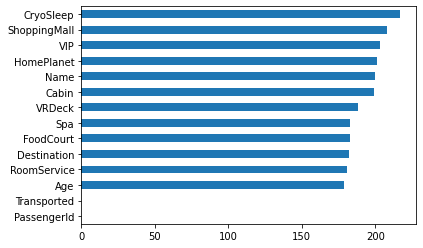

In [9]:
train.isna().sum().sort_values().plot(kind="barh")
# All columns show more or less equal amounts of NaN values - besides Target variable and PassengerID which are 100%

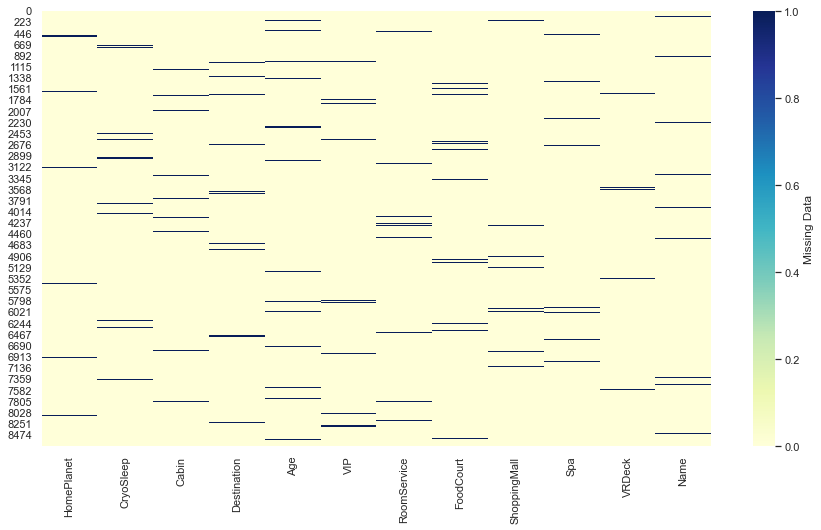

In [18]:
# Where are the NaN-values? All in same row or more distributed? 
plt.figure(figsize=(15,8)) # Do not use sns.set(...), this will change apperance of all plt plots!
nan_plot = sns.heatmap(train.drop(["PassengerId", "Transported"], axis=1).isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
#new_labels = nan_plot.set_xticklabels(nan_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

<AxesSubplot:>

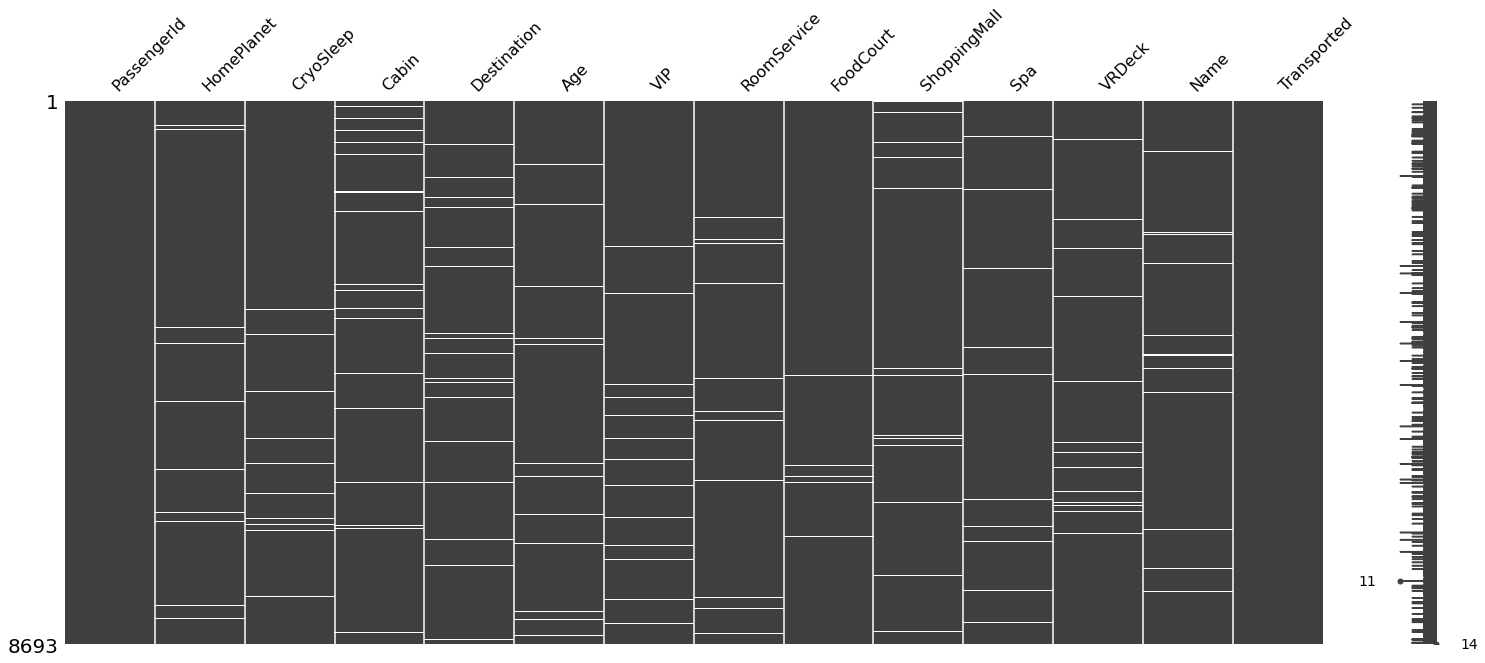

In [11]:
# Sns-heatmap was okay - but we want to search for pattern in NaN-position:
msno.matrix(train)

# We can see that there is a minimum of 11 non-NaN-values always present out of the 14 features
# so in one row a max of three values is missing.
# Most of them have all data (just a line, but not visible since too many), 
# many are missing one (first block), some are missing two (second block), very few are missing three (last block)

<AxesSubplot:>

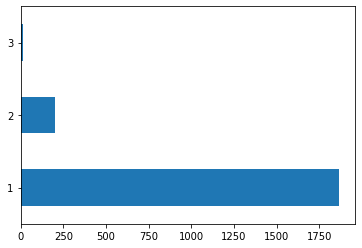

In [4]:
row_nans = train.drop(["PassengerId", "Transported"], axis=1).isnull().sum(axis=1)
row_nans[row_nans>0].value_counts().plot(kind="barh")

<AxesSubplot:>

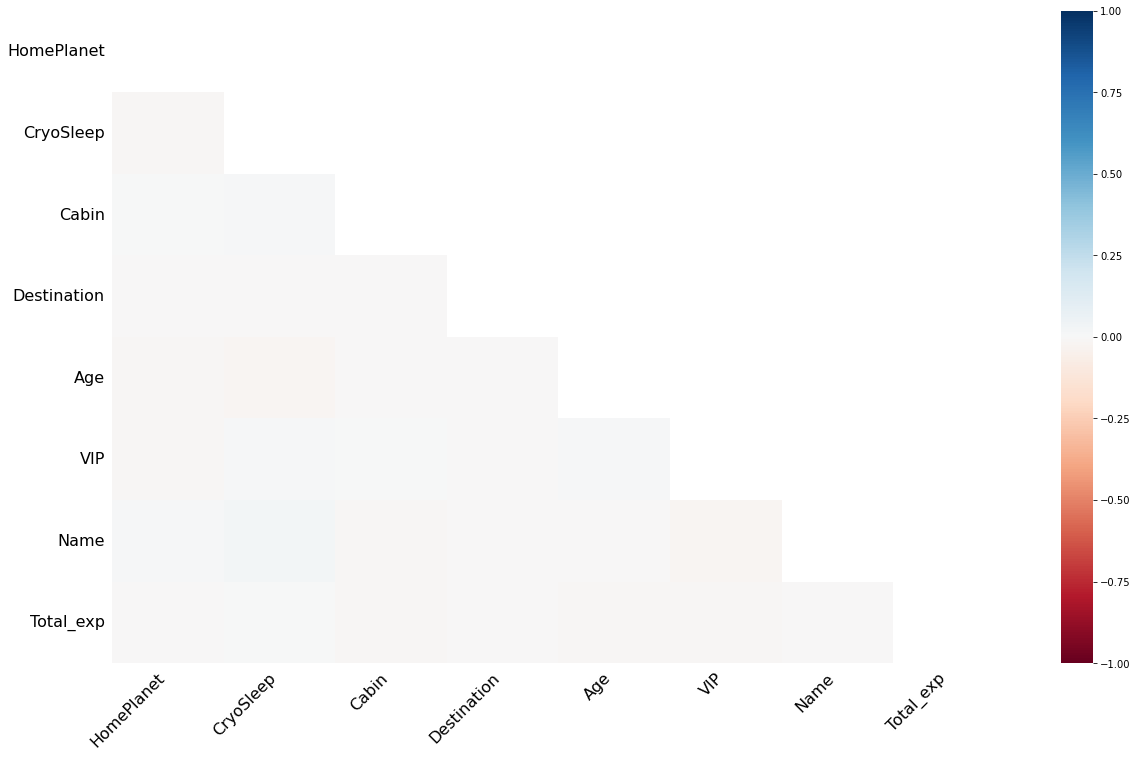

In [14]:
# Now look at NaNs in total_expenses instead of every one on their own (higher chance of seeing correlation):
nan_corr = train.drop(["PassengerId", "Transported"], axis=1)
nan_corr["Total_exp"] = train.iloc[:, [7,8,9,10,11]].sum(axis=1, skipna=False)

# Let's look at NaN-position-correlations:
# -1: If missing in this col, definetly not missing in other col
#  0: Absence of value has no correlation
#  1: If NaN in one column then definetly NaN in other column too 
msno.heatmap(nan_corr.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1))

# Interesting fact:
# The method just uses the correlation you can get with train.isna().corr()
# sns.heatmap(train.drop(["PassengerId", "Transported"], axis=1).isnull().corr(), vmin=-1, vmax=1, cmap="YlGnBu")

In [15]:
# Further interesting: The correlation coefficent is only very little influenced by more values 
# (so 1 different, 10 same similar to 1 different 1000 same)

n = 100
a = pd.DataFrame({"One":[False, True, True] + n*[True],
                 "Two":[True, False, False] + n*[True]})
print(a.var())
print(a.cov())
a.corr()

One    0.009709
Two    0.019227
dtype: float64
          One       Two
One  0.009709 -0.000190
Two -0.000190  0.019227


,One,Two
One,1.000000,-0.013933
Two,-0.013933,1.000000


In [76]:
train.VIP.astype(bool)

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: bool

In [157]:
train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.073771,-0.050342,-0.243434,-0.204765,-0.208465,-0.199075,-0.192749,0.451744
Age,-0.073771,1.000000,0.058930,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
VIP,-0.050342,0.058930,1.000000,0.050854,0.089639,-0.001104,0.037446,0.087322,-0.024602
RoomService,-0.243434,0.068723,0.050854,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,-0.204765,0.130421,0.089639,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,-0.208465,0.033133,-0.001104,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,-0.199075,0.123970,0.037446,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,-0.192749,0.101007,0.087322,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,0.451744,-0.075026,-0.024602,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [69]:
# Just to show why it makes sense to take correlation of numeric and not numeric (but be aware of lower variance?)
ex = pd.DataFrame({"num" : [0, 100, 90, 80, 110, 20, 10, 0.5, 110],
              "bool" : [False, True, True, True, True, False, False, False, True]})

ex.corr()

,num,bool
num,1.000000,0.974873
bool,0.974873,1.000000


In [16]:
# Here: We have higher variance for each of the features -> this increases the covariance
# Also: Covariance changes with feature scale, correlation keeps the same

n = 50
a = pd.DataFrame({"One":[False, True, True] + n*[True] + n*[False],
                 "Two":[True, False, False] + n*[True] + n*[False]})
print(a.var())
print(a.cov())
a.corr()

One    0.252427
Two    0.252427
dtype: float64
          One       Two
One  0.252427  0.237769
Two  0.237769  0.252427


,One,Two
One,1.000000,0.941931
Two,0.941931,1.000000


HomePlanet     0.022590
CryoSleep      0.024342
Cabin          0.022371
Destination    0.020500
Age            0.020170
VIP            0.022809
Name           0.022480
Total_exp      0.093552
dtype: float64
HomePlanet     0.087077
CryoSleep      0.093210
Cabin          0.086301
Destination    0.079640
Age            0.078450
VIP            0.087850
Name           0.086689
Total_exp      0.245902
dtype: float64


<AxesSubplot:>

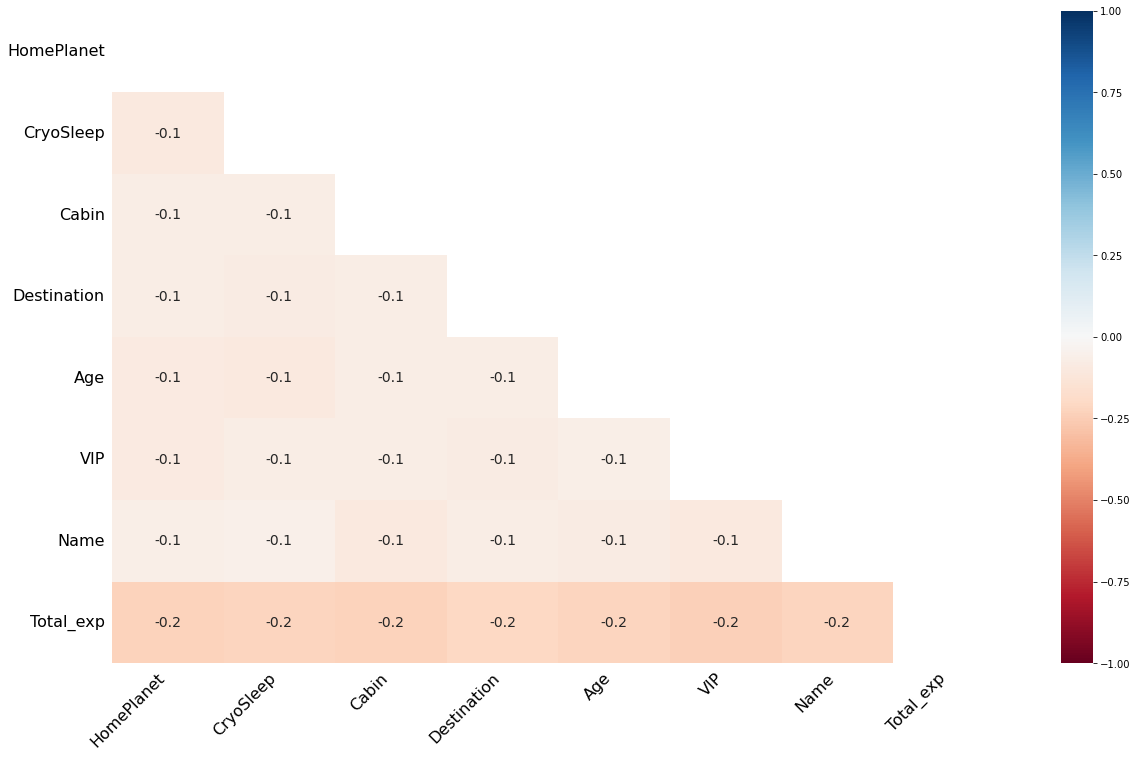

In [17]:
# So in this case where correlations are very low, it can make sense to exclude the rows with full data (so no NaNs)
# from the analysis, since they will decrease the variance (75% are full rows):
nan_corr = nan_corr.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
print(nan_corr.isna().var())
print(nan_corr[nan_corr.isna().any(1)].isna().var())

# This will not change anything regarding the relation of the correlations, just the magnitude is higher and 
# small realtions more obvious. Still only very little correlations
msno.heatmap(nan_corr[nan_corr.isna().any(1)])

**Findings of NaN-analysis:**
- PassengerId and Transported (target variable) have no missing values
- in general rows all have >= 11 values so <= 3 missing values in total, for the most part so deletion of rows does not make any sense
- there is no strong correlation between the occurence of missing values in different columns (so no systematic behind the distribution of missing values
- Does it make sense to know correlations between when NaN and certain values in other col? Maybe if this is NaN always Transported? ...

### 2.3 Analyze each column and its influence on the target variable

#### 2.3.1 PassengerID 
> A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [18]:
print(f"The train dataset contains {len(train)} records of passengers.")

The train dataset contains 8693 records of passengers.


In [19]:
train.PassengerId.value_counts().max()

# Every PassengerID is unique

1

In [20]:
train.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

**Findings:** 
- Since there are 8693 passengers, and the ID starts from 1 and increases the count, some numbers have been skipped. Why? TO DO!
- What is the meaning of "_01" and "_02" in the end of the ID? Possible new feature? It stands for the number inside the group

**Analyze the amount if groups and individual group-sizes**

In [92]:
# Look at the total number of groups and their size
num_how_often = train.PassengerId.str.split("_", expand=True)[0].value_counts()

num_how_often = num_how_often.to_frame(name="Num_group_memb").reset_index(level=0).groupby("Num_group_memb").count().reset_index(level=0)
num_how_often.columns = ["Num_group_memb", "Count"]


print(f"Total number of groups: {num_how_often.Count.sum()}\n")
print(f"Overview of group size and respective count:\n")
print(num_how_often)

Total number of groups: 6217

Overview of group size and respective count:

   Num_group_memb  Count
0               1   4805
1               2    841
2               3    340
3               4    103
4               5     53
5               6     29
6               7     33
7               8     13


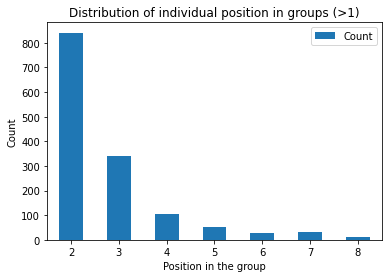

In [95]:
# Look at the according position number that are represented by the second part of the PassengerID
# Just to show that it makes sense (so 6217 groups, so there needs to be a 01 exactly 6217 times, etc.)
num_how_often[(num_how_often.Num_group_memb > 1)].plot(x="Num_group_memb", 
                                                       y="Count", 
                                                       kind="bar",
                                                       ylabel="Count",
                                                       xlabel="Position in the group",
                                                       title="Distribution of individual position in groups (>1)",
                                                       legend=True, 
                                                       rot=0)
plt.show()

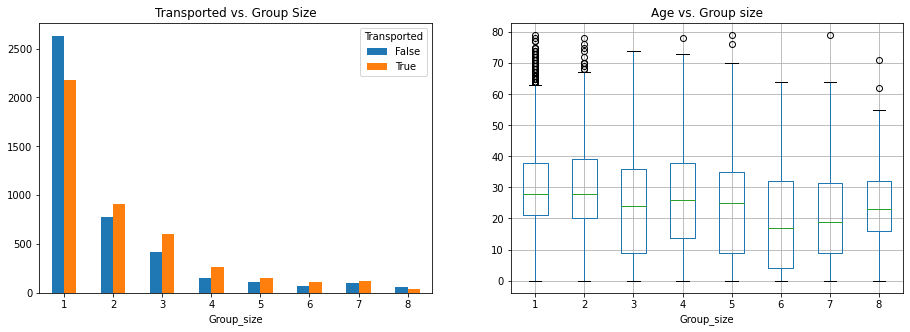

In [155]:
# Add group size as variable to each row
group_size_df = train.PassengerId.str.split("_", expand=True)
group_size_df.columns = ["ID", "Group_pos"]
group_size_df.Group_pos = group_size_df.Group_pos.str.replace("0","").astype(int)

# Get dict with ("ID": group_size)
group_size_dict = group_size_df.groupby("ID").max().to_dict()["Group_pos"]

group_size_df["Group_size"] = group_size_df.apply(lambda row: group_size_dict[row["ID"]], axis=1)

plt.figure(figsize=(15,5))
plt.subplot(1,2, 1) # Could also write ax = here

# Now let's plot again who was Transported depending on the size of group they were in 
group_size_trans_age = pd.concat([group_size_df.drop(["Group_pos", "ID"], axis=1), train.Transported, train.Age], axis=1)
group_size_trans_age[["Transported", "Group_size"]].groupby("Group_size").value_counts("Transported").unstack().plot(kind="bar", rot=0, title="Transported vs. Group Size", ax=plt.gca())

# We add a boxplot plot for the Age:
plt.subplot(1,2,2)
group_size_trans_age.boxplot(by="Group_size", column="Age", ax=plt.gca())
plt.gca().set_title("Age vs. Group size")
plt.gcf().suptitle("")
plt.show()

# TO-DO: change to sns plot (or even violin)

In [152]:
# Insight: People travelling in groups were more likely to be transported (besides 8 group members).
# From the Age Boxplots we can also see that people travelling alone or in a pair, are mostly between 20-40 
# so alone or a partner. If group sizes are bigger, there are more children in those groups, so families travelling
# together. Also we can see that in each group-size, there are Babys. Apparently, there are even babys travelling alone!

#### Analyze the Group Positions

In [23]:
# Get an overview of the g
train.PassengerId.str.split("_", expand=True)[1].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: 1, dtype: int64

<AxesSubplot:xlabel='Ending number PassengerId'>

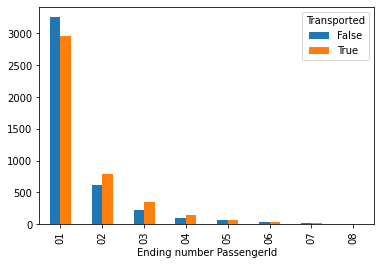

In [5]:
# Since it only consits of numbers from 1 to 8, we will transform this to a numeric or categorical new feature

# Check ratio of Transported/Not Transported for each group size
end_num_trans = pd.concat([train.PassengerId.str.split("_", expand=True)[1], train.Transported], axis=1) \
                    .groupby(1) \
                    .value_counts("Transported") \
                    .reset_index() \
                    .pivot_table(index=1, columns="Transported", values=0) \
                    .transpose() 

end_num_trans.plot(kind="bar", xlabel="Ending number PassengerId")

# There is only a slight tnedency but in general we can observe that passengers assigned as the first group 
# member were more likely to get Transported than further group members (maybe they were children for example?)

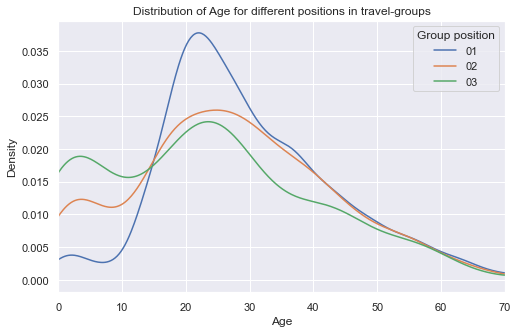

In [19]:
# Look at the age distribution 
group_position_age = pd.concat([train.PassengerId.str.split("_", expand=True)[1].to_frame("Group_pos"), train.Age], axis=1)

fig, ax = plt.subplots(figsize=(8,5))
# group_position_age.groupby('Group_pos').plot(kind='kde', ax=ax, ) Wrong labeling.

# Loop over grouped_by dataframe and get KDE for each group position up to 3
for label, df in group_position_age.groupby('Group_pos'):
    if label in ["01", "02", "03"]:
        df.Age.plot(kind="kde", ax=ax, label=label, xlim=(0,70))

plt.title("Distribution of Age for different positions in travel-groups")
plt.xlabel("Age")
plt.legend(title="Group position")
plt.show()

# We can clearly see that there is more probability mass in the younger ages (0-10) in comparison to the first 
# position, so the assumption, that passengers in second/third position are more likely kids is reasonable

**Decide on preprocessing of variable**

We transform the column containing the PassengerId on string-format into three new columns:
1. GroupID (str)   - Unique ID of the group the passenger is in
2. GroupPos (int) - Position in the group, that is assigned to passenger
3. GroupSize (int) - New feature, that assigns each passenger the size of the group he is part of

As we have seen, especially the Group_size seems so have influence on the Transported-variable. But we have to keep in mind, that both new columns, GroupPos and GroupSize, have a high correlation (0.75). So it makes sense to only include one of them in the final model.

In [41]:
def preprocess_PassengerId(data):
    """
    Preprocess PassengerID. Returns three columns:
        1. GroupID   - Unique ID of the group the passenger is in
        2. GroupPos  - Position in the group, that is assigned to passenger
        3. GroupSize - New feature, that assigns each passenger the size of the group he is part of
    """
    
    new_ID = data.PassengerId.str.split("_", expand=True)
    new_ID.columns = ["GroupID", "GroupPos"]
    new_ID.GroupPos = new_ID.GroupPos.str.replace("0","").astype(int)
    
    # Get dictionary of ID to GroupSize
    group_size_dict = new_ID.groupby("GroupID").max().to_dict()["GroupPos"]
    
    # Assign group size to each row from dict
    new_ID["GroupSize"] = new_ID.apply(lambda row: group_size_dict[row["GroupID"]], axis=1)
    
    return new_ID

preprocess_PassengerId(train)

,GroupID,GroupPos,GroupSize
0,0001,1,1
1,0002,1,1
2,0003,1,2
3,0003,2,2
4,0004,1,1
...,...,...,...
8688,9276,1,1
8689,9278,1,1
8690,9279,1,1
8691,9280,1,2


#### 2.3.2 HomePlanet

In [ ]:
train.HomePlanet.value_counts(normalize=True).plot(kind="bar", rot=0, title="Distribution of HomePlanet")

In [ ]:
train[["HomePlanet", "Transported"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", 
                                                                                         rot=0, 
                                                                                         title="HomePlanet vs. Transported")

In [ ]:
train[["HomePlanet", "CryoSleep"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", rot=0, title="HomePlanet vs. CryoSleep")

In [ ]:
train[["HomePlanet", "VIP"]].groupby("HomePlanet").value_counts().unstack().plot(kind="bar", rot=0, title="HomePlanet vs. CryoSleep")

In [ ]:
hi = train.iloc[:, [1,2,7,8,9,10,11]]
hi[hi.CryoSleep==True]

In [ ]:
home_expenses = train.iloc[:, [1,7,8,9,10,11]]
all_expenses = home_expenses.iloc[:, 1:].sum(axis=1)

all_expenses_by_home = pd.concat([home_expenses.HomePlanet, all_expenses.rename("AllExpenses")], axis=1).groupby("HomePlanet").mean()

all_expenses_by_home.sort_values("AllExpenses", ascending=False).plot(kind="bar", ylabel="Avg. expenses on board")

In [ ]:
# Now we exclude the ones in CryoSleep because they cannot pay that much since they are bound to their cabin
expenses_home_cryo = pd.concat([train[["HomePlanet", "CryoSleep"]], all_expenses.rename("AllExpenses")], axis=1)

results_cryo_expenses = expenses_home_cryo.pivot_table(index="HomePlanet", columns="CryoSleep", values="AllExpenses", aggfunc="mean")
print(results_cryo_expenses.round())

# We can see that no expenses are done in CryoSleep! Now the averages for paying visitors are even higher:
results_cryo_expenses.iloc[:,0].sort_values(ascending=False).plot(kind="barh", rot=0)

**To-Do:**
- for each of the three home planets show distribution of some important features together with Trans/Not Trans in different colours in one plot (3 rows, 4 cols, each plot two groups) to identify different groups 
- for imputation of CryoSleep and vice versa: where expenses are 0 -> CryoSleep = 1, CryoSleep=1 -> expenses 0

In [ ]:
cryo_expenses.CryoSleep.isnull().sum()
cryo_expenses[0].isnull().sum()

In [ ]:
cryo_expenses[cryo_expenses.CryoSleep.isnull()]

In [ ]:
cryo_expenses[cryo_expenses.isna().any(1)]

In [ ]:
# Compute all expense but keep NaN if one is NaN
all_expenses_NaN = home_expenses.iloc[:, 1:].sum(axis=1, skipna=False)
cryo_expenses = pd.concat([train.CryoSleep, all_expenses_NaN], axis=1)

print(len(cryo_expenses[cryo_expenses.isna().any(1)])) # Total where one or both are NaN
print(cryo_expenses[cryo_expenses.CryoSleep.isna() &  ~cryo_expenses[0].isna()].shape[0]) # Can be 100% resolved
print(cryo_expenses[cryo_expenses[0].isna() &  cryo_expenses.CryoSleep==True].shape[0]) # Can be 100% resolved

In [ ]:
# TO-DO: Do it in nicer way!
hi = train.iloc[:, [1,2,7,8,9,10,11]].copy()
hi[hi.CryoSleep==True]

In [ ]:
hi["Total_exp"] = hi.iloc[:, 2:].sum(axis=1, skipna=False)
nan_expenses = hi[hi.Total_exp.isna()]
nan_expenses[nan_expenses.CryoSleep == True] # CryoSleep + NaN in expenses? - 347 rows: just fill in 0 for each expense

# NaN CryoSleep + Expenses not NaN: -> True is ==0, False if >0
# NaN CryoSleep + Expenses NaN:  1) only zeros other than NaN? -> CryoSleep=True, RestExp=0
#                                2) at least one value >0? -> CryoSleep=False, RestExp=mean of HomePlanet (TO-DO)
nan_expenses[nan_expenses.CryoSleep.isna()]

#### 2.3.3 CryoSleep

#### 2.3.4 Cabin

#### 2.3.5 Destination

#### 2.3.6 Age

In [153]:
hi = pd.concat([group_size_df.drop(["ID"], axis=1), train.Transported, train.Age], axis=1)
hi[(hi.Age==0) & (hi.Group_pos==1) & (hi.Group_size==1)]
# Age 0 and travelling alone

,Group_pos,Group_size,Transported,Age
3616,1,1,True,0.0
4858,1,1,True,0.0
4892,1,1,False,0.0
5988,1,1,False,0.0
7194,1,1,False,0.0
7207,1,1,True,0.0
8584,1,1,True,0.0


#### 2.3.7 VIP

#### 2.3.8 RoomService

#### 2.3.9. FoodCourt

#### 2.3.10 ShoppingMall

#### 2.3.11 Spa

#### 2.3.12 VRDeck

#### 2.3.13 Name

#### 2.3.14 Transported - Target Variable

**TO-DO: Put this analysis first.**

### Other stuff

(array([2., 1., 2., 4., 1., 2., 2., 1., 1., 3.]),
 array([-0.69314718,  0.15857214,  1.01029146,  1.86201078,  2.7137301 ,
         3.56544942,  4.41716873,  5.26888805,  6.12060737,  6.97232669,
         7.82404601]),
 <BarContainer object of 10 artists>)

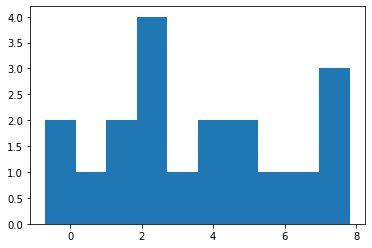

In [56]:
a = [0.5, 1, 2, 3, 5, 7, 9, 10, 15, 25, 50, 60, 100, 190, 300, 500, 1300, 1400, 2500]
#plt.hist(a, bins=30)

import numpy as np

plt.hist(np.log(a))

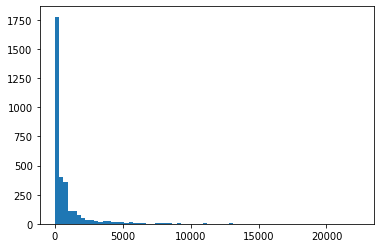

In [70]:
# Normal scale
plt.hist(train.Spa[train.Spa>0], bins=70)
plt.show()

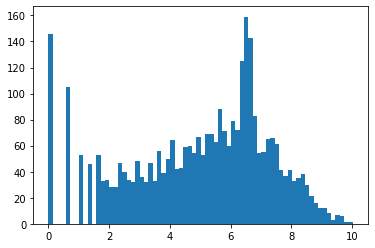

In [71]:
# Log scale
plt.hist(np.log(train.Spa[train.Spa>0]), bins=70)
plt.show()

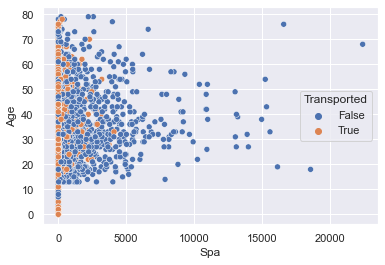

In [73]:
# Same in sns
sns.set(style = "darkgrid")
scatt = sns.scatterplot(x=train.Spa, y=train.Age, hue=train.Transported)
#scatt.set(ylabel=None)

In [29]:
plt.rcParams.update(plt.rcParamsDefault)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/patrickhiemsch/miniforge3/envs/TF_M1/lib/python3.9/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/Users/patrickhiemsch/miniforge3/envs/TF_M1/lib/python3.9/site-packages/matplotlib/ticker.py:548: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


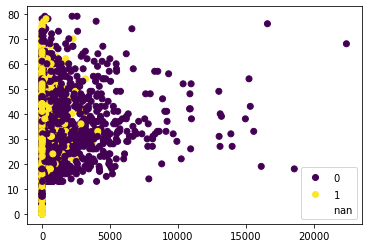

In [30]:
%matplotlib inline

sc = plt.scatter(x=train.Spa, y=train.Age, c=train.Transported)
plt.legend(*sc.legend_elements())

# Seaborn is way nicer in handling legends with categories

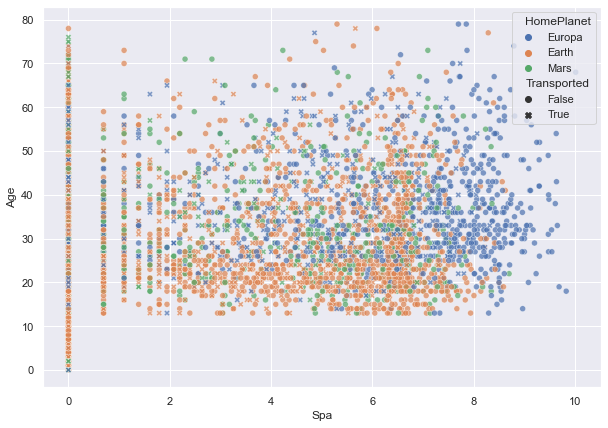

In [80]:
# All together
plt.figure(figsize=(10,7))
scatt = sns.scatterplot(x=np.log(train.Spa+1), y=train.Age, hue=train.HomePlanet, style=train.Transported, alpha=0.7)

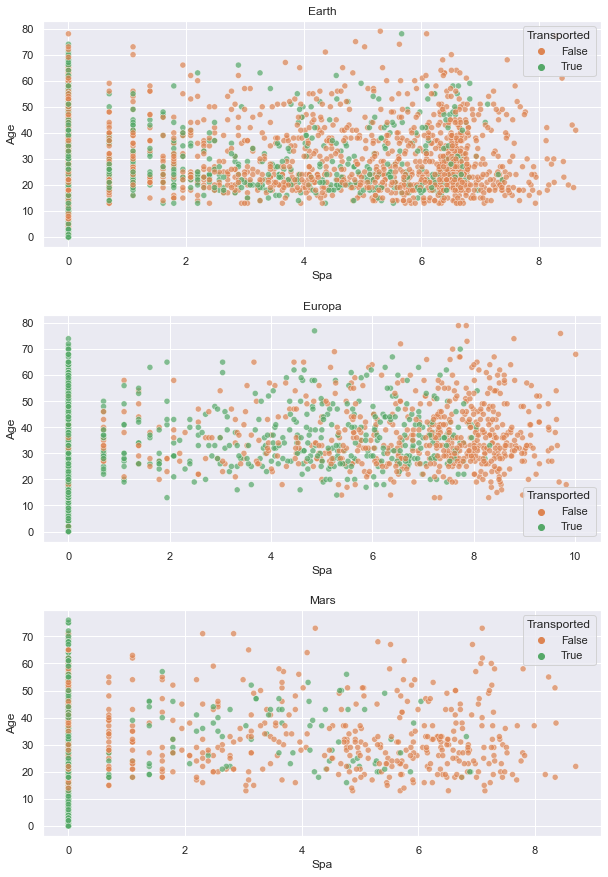

In [118]:
# Seperated
home_pl = train.groupby("HomePlanet")
i=1
fig = plt.figure(figsize=(10,15))
for key, df in home_pl:
    plt.subplot(3,1,i)
    sc = sns.scatterplot(x=np.log(df.Spa+1), y=df.Age, hue=train.Transported, palette=["C1", "C2"], alpha=0.7)
    sc.set(title=key)
    i+=1
# color=f"C{i-1}"
fig.subplots_adjust(hspace=0.3)
plt.show()

/var/folders/ds/ccqkblhx43bf8fpz7y_2_kj80000gn/T/ipykernel_21038/3589858634.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(sc.legend_elements()[0], handles=sc.legend_elements()[0], labels=["NaN", 'Earth', 'Europa', 'Mars'])


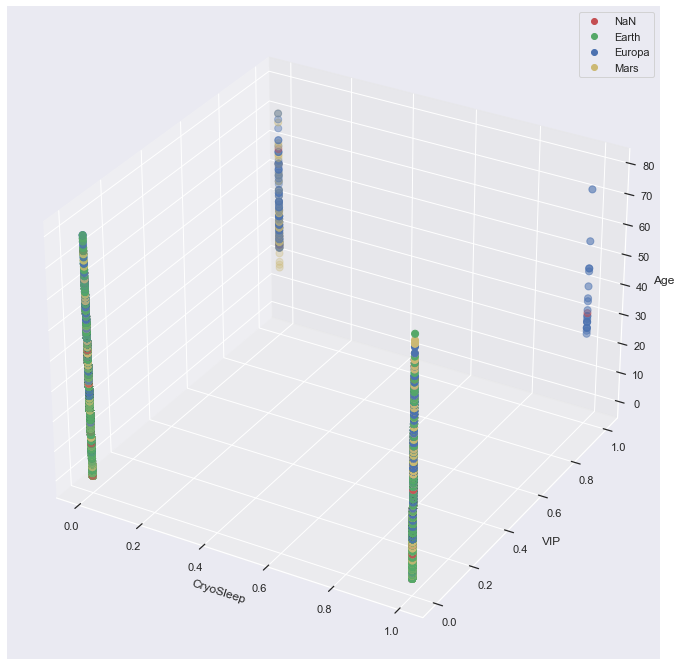

In [77]:
from matplotlib.colors import LinearSegmentedColormap
sns.set(style = "darkgrid")
try_it = train
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [6.4, 4.8]
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Create own color mapping
cmap = LinearSegmentedColormap.from_list("My-own", ["r", "g", "b", "y"], N=4)

sc = ax.scatter(try_it.CryoSleep, try_it.VIP, try_it.Age, c=try_it.HomePlanet.astype("category").cat.codes, cmap=cmap, s=50)
ax.set_xlabel("CryoSleep")
ax.set_ylabel("VIP")
ax.set_zlabel("Age")
ax.legend(sc.legend_elements()[0], handles=sc.legend_elements()[0], labels=["NaN", 'Earth', 'Europa', 'Mars'])
#ax.legend(*sc.legend_elements(), title="Transported")
# If not categorical variable
# handles=sc.legend_elements()[0], labels=["NaN", 'Earth', 'Europa', 'Mars']
plt.show()
# Reset default matplotlib settings:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [6.4, 4.8]
# C0 is blue, C1 ...

## 3. Preprocess the data

Idea for imputation: kNN?

## 4. Engineer models and predict target variable

#### Compare different Imputation-strategies (What about sampling from KDE?, Multiple-Imputaiton? Gibbs Sampling? EM-Algorithm?), so first 100% imputation and then compare mean/mode with fancier techniques